In [1]:
import pandas as pd
from pandas import DataFrame
import pickle
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import ScalarFormatter
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_pickle('.././data/pickle/pypf_prep.pkl') # load data

In [3]:
df = df[df['Agegroup'] != 'ALL AGES'] # lets throw away all ages rows 

agemidpoint = {'ALL AGES': 100, 'UNDER 25': 20, '25-34':30, '35-44':40, 
               '45-54':50, '55-64':60, '65-74':70, '75-84':80, '85+':90}

df['Agemidpoint'] = df.Agegroup.map(lambda x: agemidpoint.get(x)) # lets give everyone an age mid point
df['YearOfDeath'] = df.Year.map(lambda x: x.year)
df['dob'] = df['YearOfDeath'] - df['Agemidpoint'] # dob is appoximately year of death - age midpoint
df['birthcohort'] = pd.cut(df.dob, range(1880,2010,10), 
                           labels=['1880-1889', '1890-1899', '1900-1909', '1910-1919', 
                                   '1920-1929','1930-1939','1940-1949','1950-1959',
                                   '1960-1969', '1970-1979', '1980-1989', '1990-1999'],
                          right=False) # add birth cohorts
df['Rate per million population'] = df['Rate per 100,000 population'] * 10


In [4]:
mask = {}
mask['male-ipf-cohort'] = eval("(df['Sex'] == 'Male') & (df['Cause'] == 'IPF') & (df['birthcohort'] < '1980-1989')")
mask['female-ipf-cohort'] = eval("(df['Sex'] == 'Female') & (df['Cause'] == 'IPF') & (df['birthcohort'] < '1980-1989')")
mask['malefemale-ipf-cohort'] = eval("(df['Cause'] == 'IPF') & (df['birthcohort'] < '1980-1989')")


mask['male-meso-cohort'] = eval("(df['Sex'] == 'Male') & (df['Cause'] == 'All Mesothelioma') & (df['birthcohort'] < '1980-1989')")
mask['male-asb-cohort'] = eval("(df['Sex'] == 'Male') & (df['Cause'] == 'Asbestosis') & (df['birthcohort'] < '1980-1989')")


mask['male-ipf-cohort-ne'] = eval("(df['Sex'] == 'Male') & (df['Cause'] == 'IPF') & (df['birthcohort'] < '1980-1989') & (df['Region'] == 'NORTH EAST')")
mask['male-meso-cohort-ne'] = eval("(df['Sex'] == 'Male') & (df['Cause'] == 'All Mesothelioma') & (df['birthcohort'] < '1980-1989')& (df['Region'] == 'NORTH EAST')")


def plot_cohort_year(df, mask, title):
    cohort_data = {}

    df = df[mask]
    
    for cohort in df['birthcohort'].unique():
        grp = df[df['birthcohort'] == cohort].groupby('Year')
        cohort_data[cohort] = grp['Rate per million population'].mean()
        
    ax = pd.DataFrame(cohort_data).plot(figsize=(7,7), title=title)
    ax.set_ylabel("Rate per million")
    ax.set_xlabel("Age")
    ax.set_yscale("log", nonposy='clip')
    ax.legend(loc='upper left', frameon=False)
    # plt.ylim(ymin = 0.0)
    ax.yaxis.set_major_formatter(ScalarFormatter()) # scale as a full number not a power
    plt.grid(True)
    plt.show()
    
    
def plot_cohort_age(df, mask, title):
    cohort_data = {}

    df = df[mask]
    
    for cohort in df['birthcohort'].unique():
        grp = df[df['birthcohort'] == cohort].groupby('Agemidpoint')
        cohort_data[cohort] = grp['Rate per million population'].mean()
        
    ax = pd.DataFrame(cohort_data).plot(figsize=(7,7), title=title)
    ax.set_ylabel("Rate per million")
    ax.set_xlabel("Age")
    ax.set_yscale("log", nonposy='clip')
    ax.legend(loc='upper left', frameon=False)
    # plt.ylim(ymin = 0.0)
    ax.yaxis.set_major_formatter(ScalarFormatter()) # scale as a full number not a power
    plt.grid(True)
    plt.savefig('.././fig/{}'.format(title))
    plt.show()

In [5]:
# black and white mode
def black_and_white_mode():
    from cycler import cycler
    color_c = cycler('color', ['k'])
    style_c = cycler('linestyle', ['-', '--', ':', '-.'])
    markr_c = cycler('marker', ['', '.', 'o'])
    c_cms = color_c * markr_c * style_c
    c_csm = color_c * style_c * markr_c
    plt.rc('axes', prop_cycle=c_cms)

In [6]:
# plot_cohort_year(df, mask['male-ipf-cohort'], 'IPF Mortality trends in England and Wales for Males \n by birth cohort')
# plot_cohort_year(df, mask['male-meso-cohort'], 'Mesothelioma Mortality trends in England and Wales for Males \n by birth cohort')

/home/drcjar/.virtualenvs/litsearch2/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


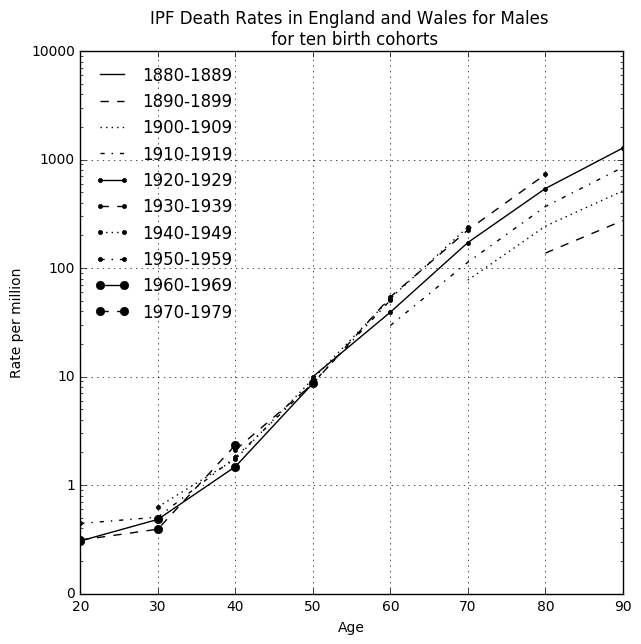

In [7]:
black_and_white_mode() # winter bts doesn't support colour
plot_cohort_age(df, mask['male-ipf-cohort'], 'IPF Death Rates in England and Wales for Males \n for ten birth cohorts')


/home/drcjar/.virtualenvs/litsearch2/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


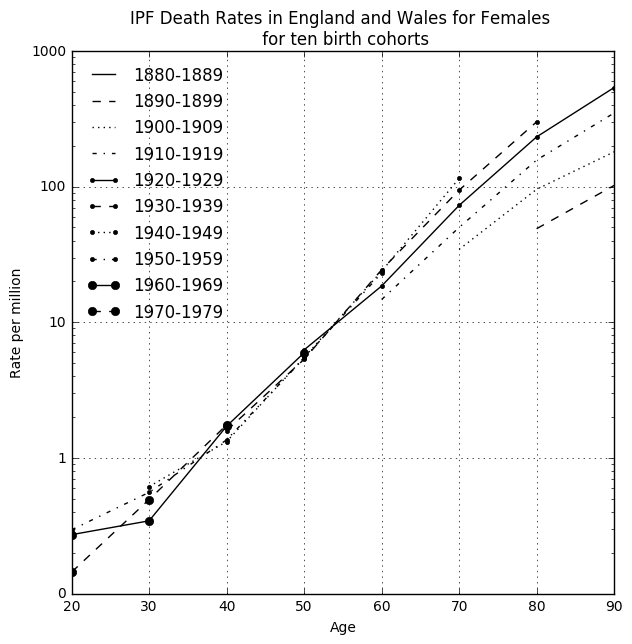

In [8]:
plot_cohort_age(df, mask['female-ipf-cohort'], 'IPF Death Rates in England and Wales for Females \n for ten birth cohorts')


/home/drcjar/.virtualenvs/litsearch2/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


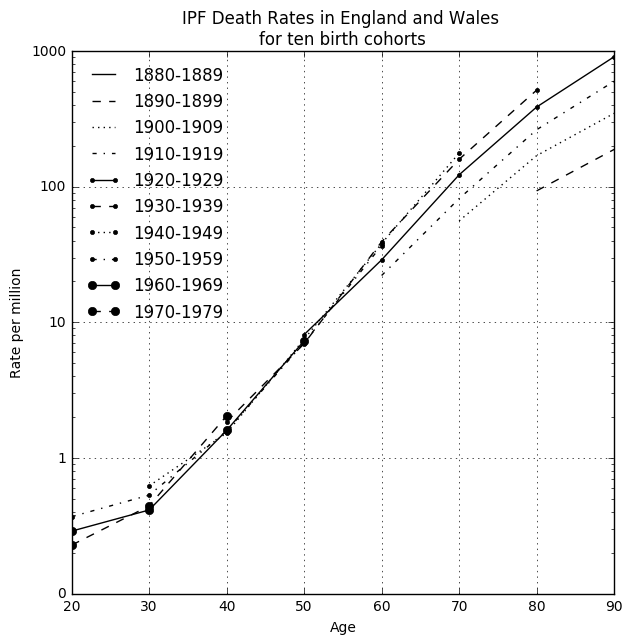

In [15]:
plot_cohort_age(df, mask['malefemale-ipf-cohort'], 'IPF Death Rates in England and Wales \nfor ten birth cohorts')

/home/drcjar/.virtualenvs/litsearch2/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


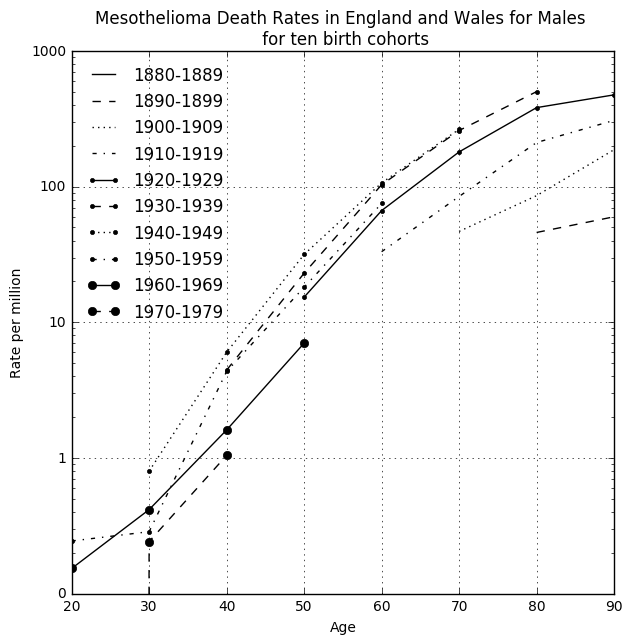

In [10]:
plot_cohort_age(df, mask['male-meso-cohort'], 'Mesothelioma Death Rates in England and Wales for Males \n for ten birth cohorts')

/home/drcjar/.virtualenvs/litsearch2/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


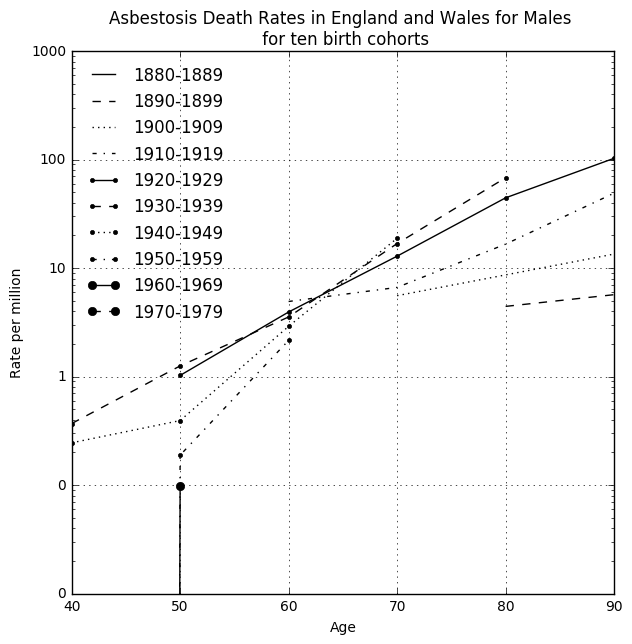

In [11]:
plot_cohort_age(df, mask['male-asb-cohort'], 'Asbestosis Death Rates in England and Wales for Males \n for ten birth cohorts')

In [12]:
# plot_cohort_age(df, mask['male-meso-cohort-ne'], 'Mesothelioma Mortality trends in England and Wales for Males \n by birth cohort \n for the North East')
# plot_cohort_age(df, mask['male-ipf-cohort-ne'], 'IPF Mortality trends in England and Wales for Males \n by birth cohort \n for the North East')

In [13]:
df[(df.birthcohort == '1960-1969') & (df.Cause == 'IPF')].groupby('Agemidpoint')['Rate per 100,000 population'].mean()

Agemidpoint
20    0.028831
30    0.041272
40    0.159534
50    0.729613
Name: Rate per 100,000 population, dtype: float64